<a href="https://colab.research.google.com/github/BBotond03/SkinCancerDetection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Script for Downloading the Data
1. We download the data  through the Kaggle API (for this we will have to provide out personal API key, this can be found at Kaggle profile settings).
2. Extract the downloaded zip file

In [1]:
#to be able to download the dataset to our current runtime
!pip install kaggle

In [2]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the actual file name from the dictionary
file_name = list(uploaded.keys())[0]
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Save the API key securely without displaying it
with open('/root/.kaggle/kaggle.json', 'wb') as f:
    f.write(uploaded[file_name])

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [3]:
!kaggle competitions download -c isic-2024-challenge

100% 2.00G/2.00G [00:20<00:00, 187MB/s]
100% 2.00G/2.00G [00:20<00:00, 106MB/s]


In [4]:
import zipfile
import os

# Path to your zip file and extract location
zip_file_path = 'isic-2024-challenge.zip'
extract_to_path = 'data'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)
    print("Extraction completed.")

Extraction completed.


# Data Preproccessing

In [5]:
!pip install tensorflow

In [13]:
#neccesary imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import tensorflow_datasets as tfds
import shutil
import pandas as pd

In [26]:
# Parameters
train_csv_path = './data/train.csv'
test_csv_path = './data/test.csv'
train_image_dir = './data/train-image'
test_image_dir = './data/test-image'

batch_size = 32
img_height = 180
img_width = 180

In [27]:

# Path to the main directory containing all images
main_dir = './data/train-image'

# Initialize the ImageDataGenerator with a validation split

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = tf.keras.utils.image_dataset_from_directory(
  main_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  main_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 401059 files belonging to 1 classes.
Using 320848 files for training.
Found 401059 files belonging to 1 classes.
Using 80211 files for validation.


In [28]:
class_names = train_ds.class_names
print(class_names)

['image']


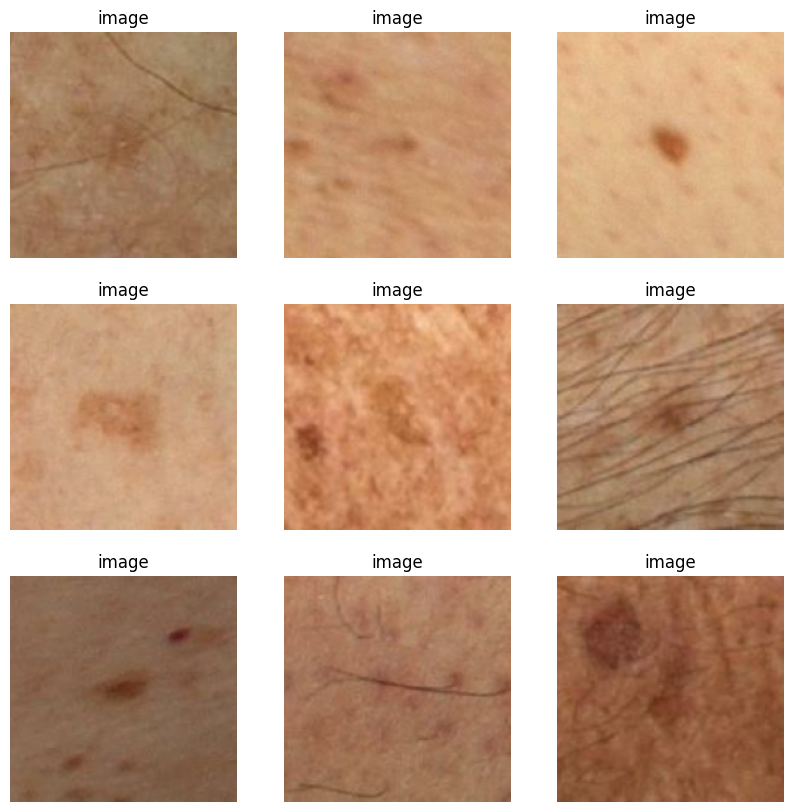

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")